# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####  데이터 수집

In [2]:
#데이터셋을 로드
from sklearn.datasets import load_boston

boston = load_boston()

####  데이터 이해

In [3]:
#데이터셋 정보확인

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

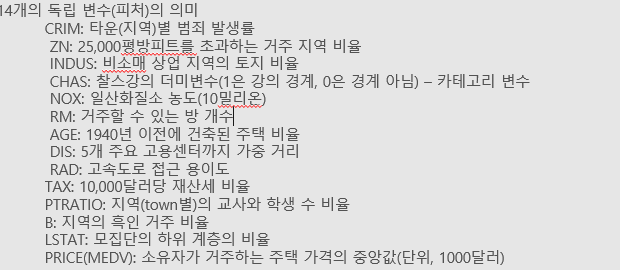

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [7]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# 데이터의 크기와 형태를 확인
boston_df.shape

(506, 14)

In [10]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [11]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [12]:
boston_df.drop(['CHAS'], axis=1, inplace=True)

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
# 독립변수와 종속변수와의 관계에 대한 산점도 시각화

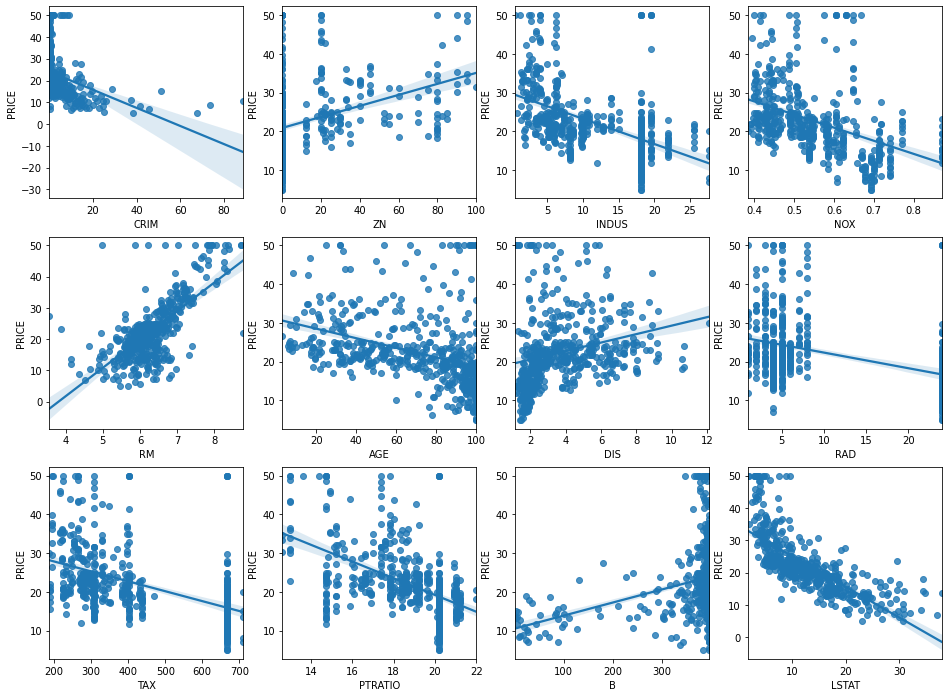

In [15]:
import seaborn as sns

#3행 4열의 subplots를 준비한다(캔버스 작업)
fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=4)

x_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
    
    #현재 subplot의 행, 열 번호 갱신
    row = int(i/4) #column이 4개이므로
    col = i%4
    
    #산점도와 회귀선 시각화
    sns.regplot(x=feature, y='PRICE', data=boston_df,
               ax=axs[row][col])

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


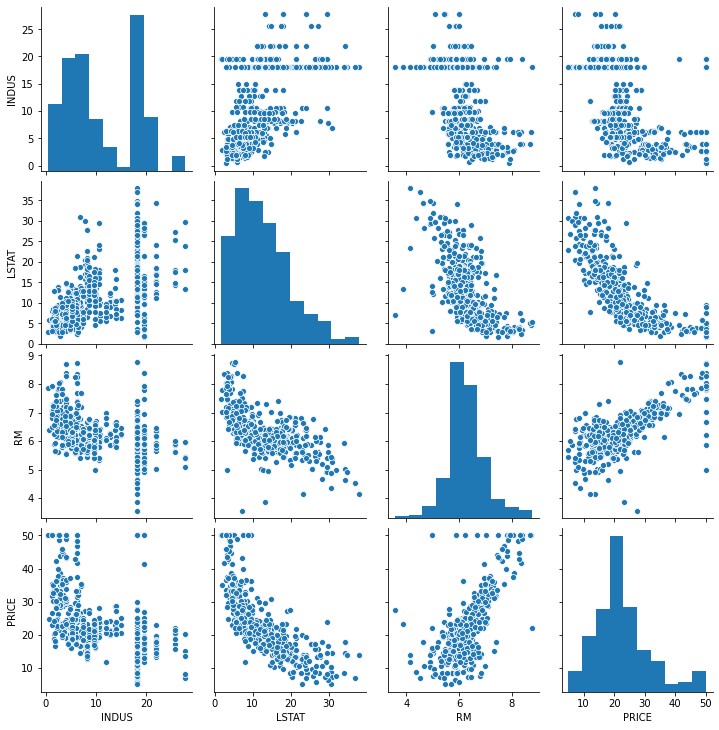

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 
ccol = ['INDUS', 'LSTAT', 'RM', 'PRICE']

#pairplot 시각화
sns.pairplot(boston_df[ccol])

#또는 매개변수로 컬럼들을 직접 선택해서 시각화할 수 있다.
#sns.pairplot(boston_df, vars=ccol)

In [17]:
corrs = boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


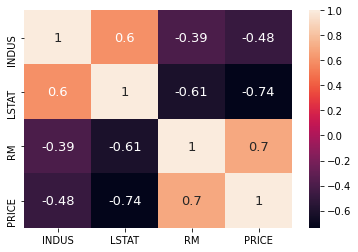

In [18]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()

import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다.
ccol = ['INDUS', 'LSTAT', 'RM', 'PRICE']

# 변수 간의 상관계수를 구한다.
corrs = boston_df[ccol].corr()

# 상관계수 값에 대한 히트맵
# 매개변수 annot: 맵에 값 표시 여부 지정
# 매개변수 annot_kws: 표시되는 값에 대한 추가 옵션

sns.heatmap(corrs, annot=True, annot_kws={'size':13})

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

### 데이터 준비

#### 데이터 분할

In [19]:
from sklearn.model_selection import train_test_split

# X(독립변수), Y(종속변수) 분할
X = boston_df.drop(['PRICE'], axis=1)
y = boston_df['PRICE']

# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


### 모델 클래스 선택

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

### 모델 구축 

In [23]:
#학습 수행
reg.fit(X_train, y_train)

LinearRegression()

### 모델 평가

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

MSE: 21.697, RMSE: 4.658
R2: 0.708814


In [26]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))

print("Adjusted R2: {:.4f}".format(adj_r2))

Adjusted R2: 0.6986


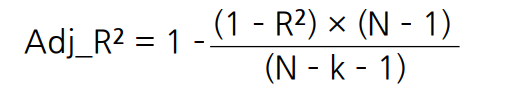

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [27]:
#ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)

#회귀 계수와 절편값 확인
print("Y절편: {:.3f}".format(reg.intercept_))
print("회귀 계수:", np.round(reg.coef_, 3))

#ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

Y절편: 31.428
회귀 계수: [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [28]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
coef = pd.Series(data = np.round(reg.coef_, 3), index = X.columns)

print('y =' + str(reg.intercept_) + ' + ')

for i, c in zip(coef.index, coef.values):
    print('(' + str(c) + ')*' + str(i))

y =31.4284794823025 + 
(-0.142)*CRIM
(0.038)*ZN
(0.073)*INDUS
(-14.901)*NOX
(4.146)*RM
(-0.009)*AGE
(-1.418)*DIS
(0.277)*RAD
(-0.01)*TAX
(-0.937)*PTRATIO
(0.013)*B
(-0.566)*LSTAT


###  실제값과 예측값의 분포차이를 시각화

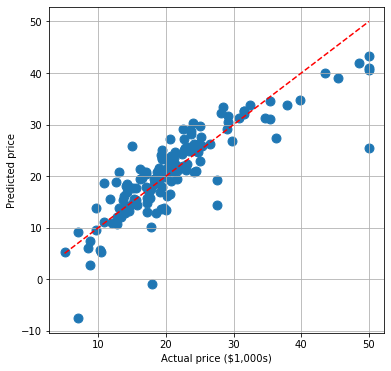

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([5, 50], [5, 50], c='r', ls='--')
plt.xlabel("Actual price ($1,000s)")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [31]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.

import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           4.52e-91
Time:                        14:05:34   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0

# [응용1]: 다중 선형회귀 연습- load_diabetes

### 필요한 모듈 import

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 데이터 수집

In [34]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

In [ ]:
### 데이터 이해

In [37]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [38]:
diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### 데이터 준비

In [35]:
from sklearn.model_selection import train_test_split

# X(독립변수), y(종속변수) 분할
X = diab.data
y = diab.target

# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [53]:
### 모델 구축

# 회귀 모델 객체 생성
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#학습 수행
reg.fit(X_train, y_train)


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)


#ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)
#회귀 계수와 절편값 확인
print("Y절편: {:.3f}".format(reg.intercept_))
print("회귀 계수:", np.round(reg.coef_, 3))
#ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress=False)

#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
coef = pd.Series(data = np.round(reg.coef_, 3), index = pd.DataFrame(X).columns).sort_values(ascending=False)
for i, c in zip(coef.index, coef.values):
    print(diab_df.columns[i], c)

Y절편: 152.628
회귀 계수: [ -31.805 -214.672  445.138  376.355 -802.452  525.952  106.4    172.311
  799.479   57.168]
s5 799.479
s2 525.952
bmi 445.138
bp 376.355
s4 172.311
s3 106.4
s6 57.168
age -31.805
sex -214.672
s1 -802.452


In [43]:
# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

# 수정된 결정 계수 확인(Ajusted-R2)
n = len(X_train)
k = len(pd.DataFrame(X_train).columns)
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))
print("Adjusted R2: {:.4f}".format(adj_r2))

MSE: 2919.751, RMSE: 54.035
R2: 0.501262
Adjusted R2: 0.4845


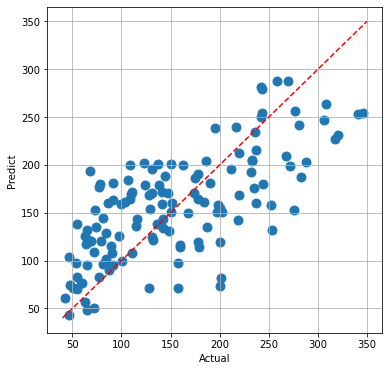

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     32.28
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           5.27e-42
Time:                        14:29:31   Log-Likelihood:                -1668.1
No. Observations:                 309   AIC:                             3358.
Df Residuals:                     298   BIC:                             3399.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.6275      3.116     48.976      0.0

In [58]:
### 모델 평가
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([40, 350], [40, 350], c='r', ls='--')
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.grid()
plt.show()

# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

# [응용2] 캘리포니아 주택 가격

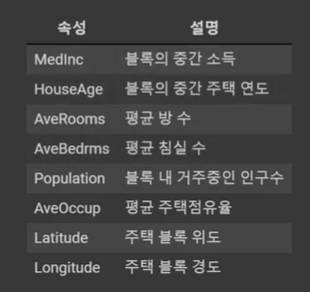

### 데이터 수집 및 탐색

In [59]:
#fetch data이므로 온라인으로만 fetch가능
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [23]:
#샘플:20640

In [24]:
#속성 :8개

# 시각화로 탐색

In [60]:
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df.head()

california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


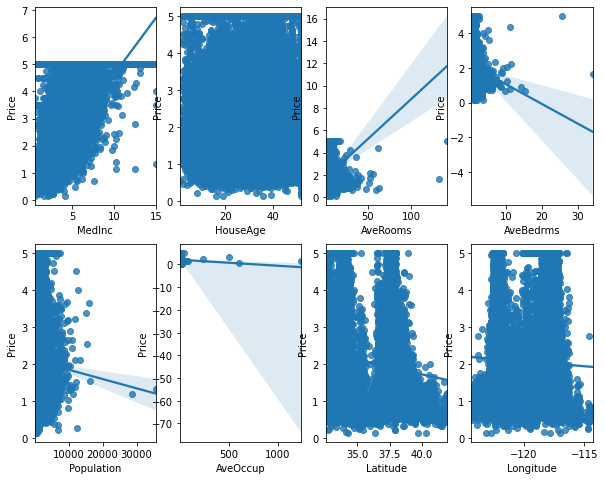

In [26]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [27]:
# 독립변수 간 상관관계 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


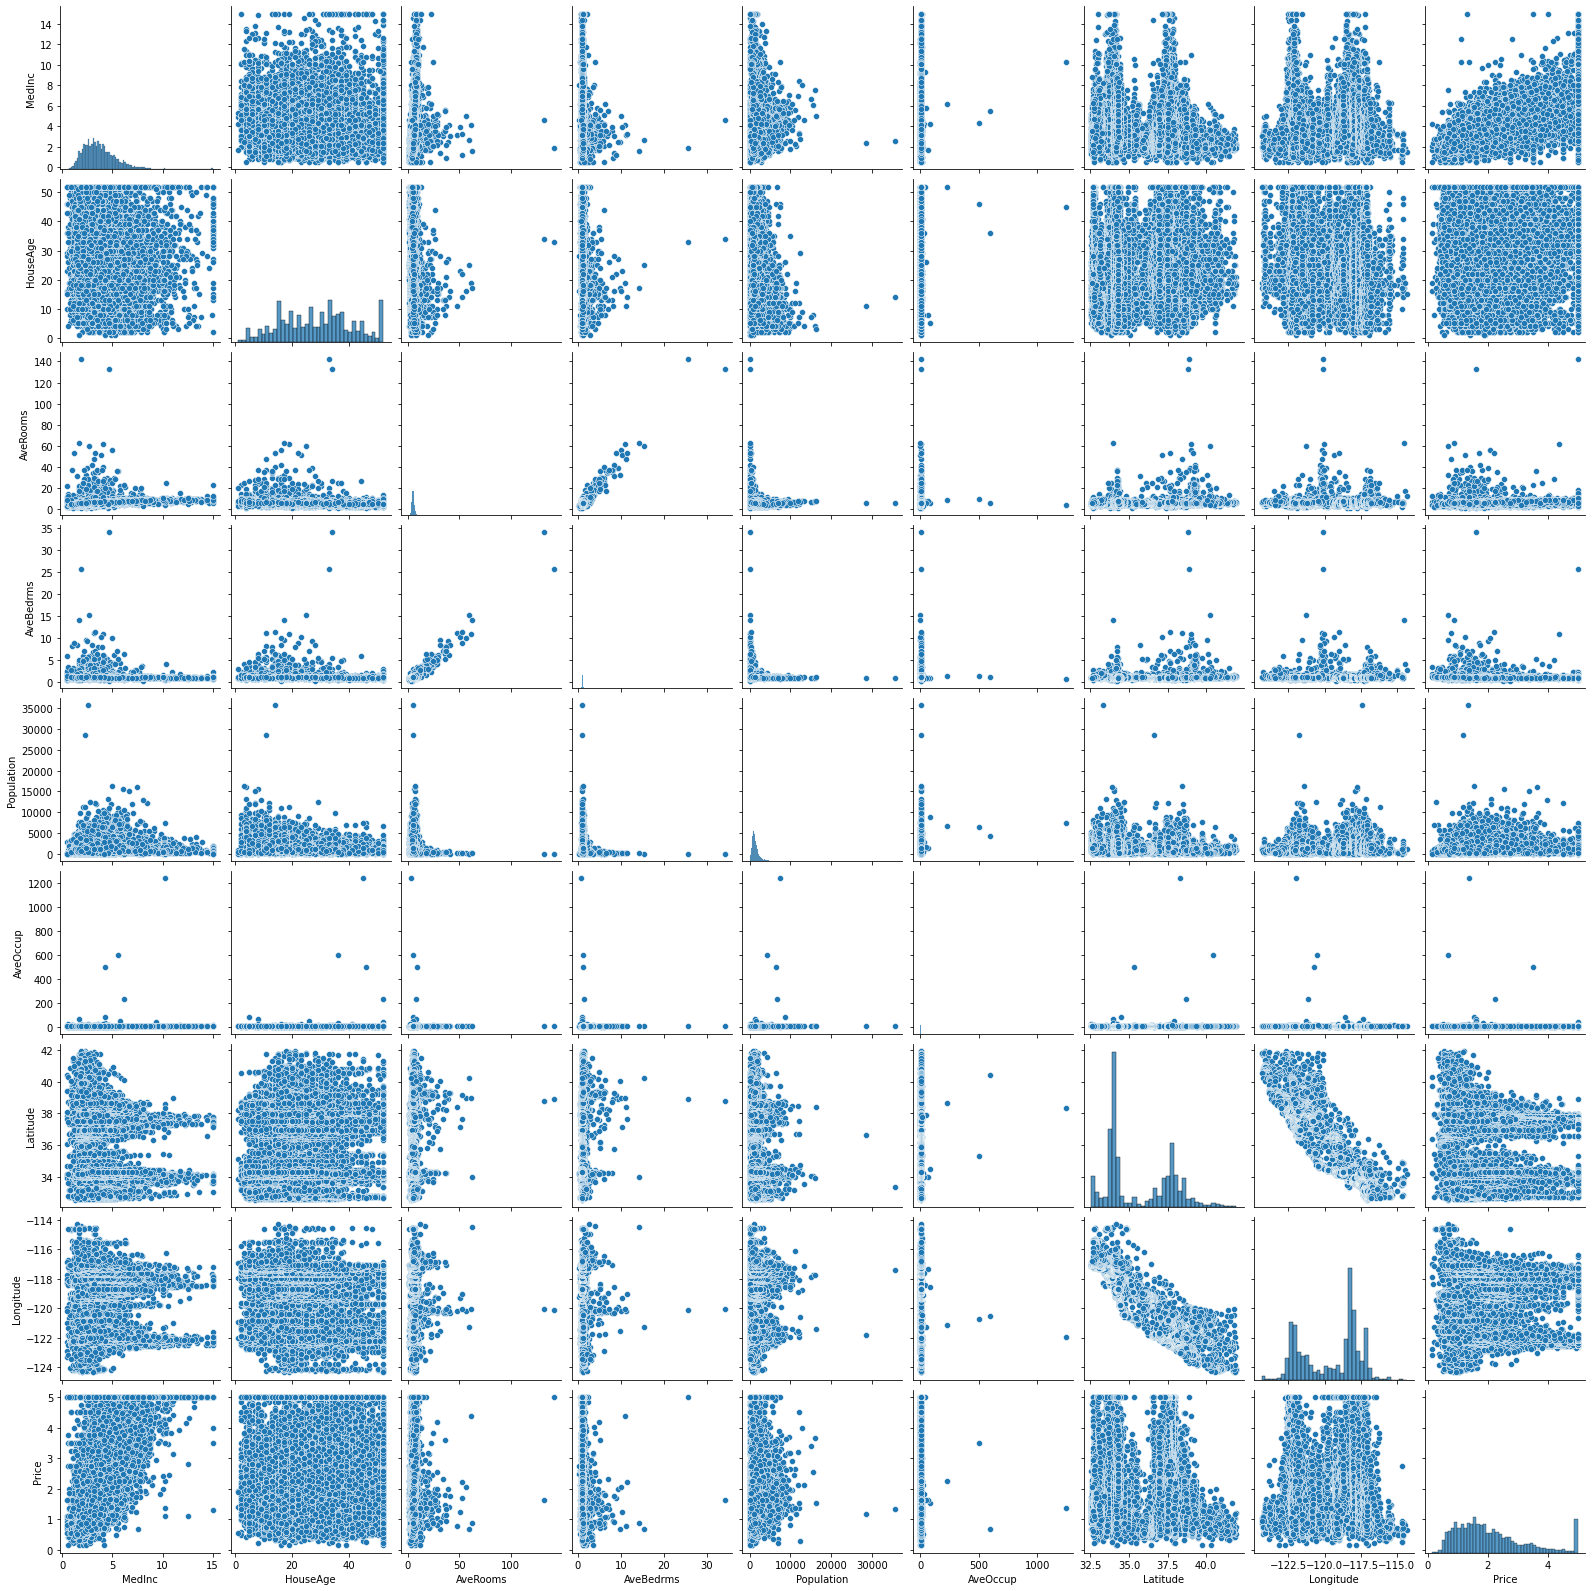

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


#pairplot 시각화



Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

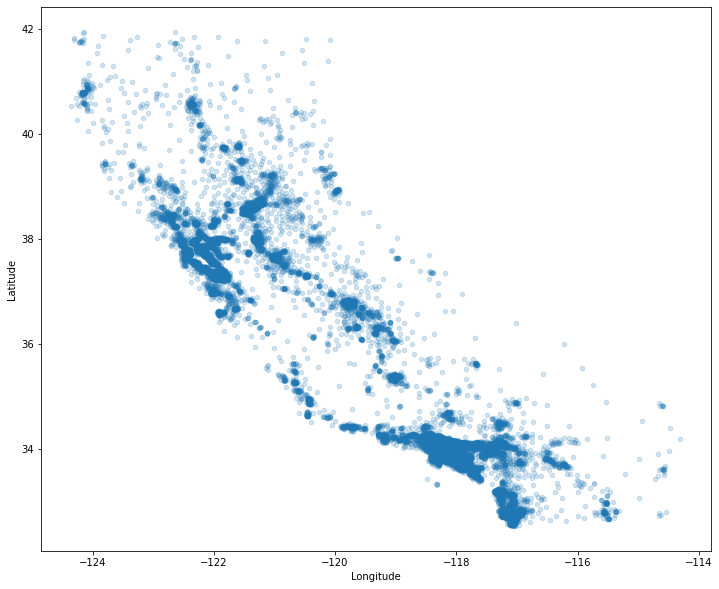

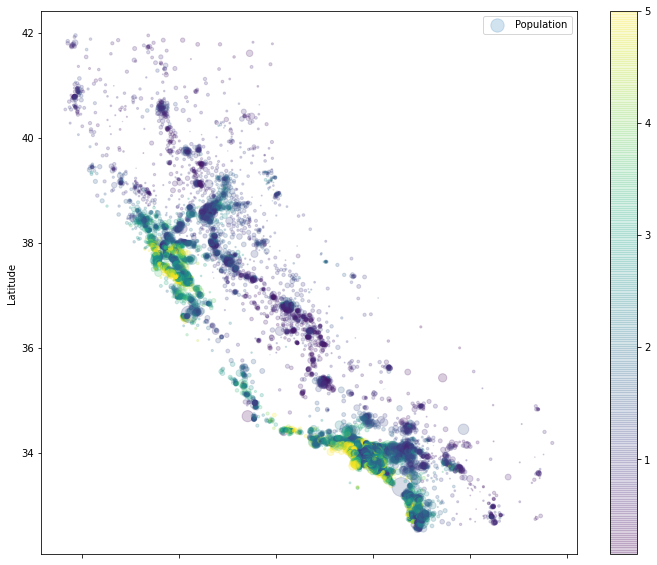

In [61]:
# 위경도 데이터 시각화
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100, \
                   figsize=(12, 10), label='Population', c=california_df['Price'], cmap=plt.get_cmap('viridis'),\
                  colorbar=True);

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

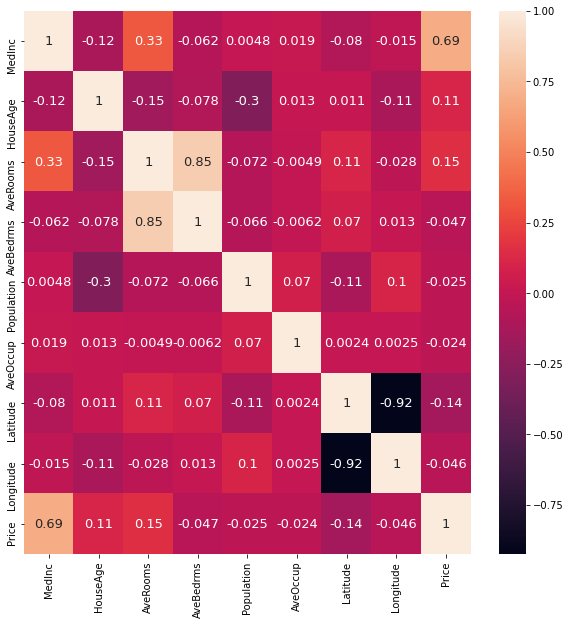

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

#상관 계수 값에 대한 히트맵


In [35]:
# 선형회귀

# 회귀식으로 표현

# 결과 시각화 ( actual price VS predicted price)

Score: 0.6314085220192572
y = -36.90984316467035 
0.4308326968560208* x0
0.00963531754511315* x1
-0.10092932263369295* x2
0.6003443724471089* x3
-4.401042015715751e-06* x4
-0.004648388626165133* x5
-0.4240711038346886* x6
-0.4353688584776837* x7


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

MSE: 0.483, RMSE: 0.695
R2: 0.631409


In [37]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수

print("Adjusted R2: {:.4f} ".format(adj_r2))

Adjusted R2: 0.6312 
